In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm



Exercise 1 with Pandas

In [14]:
df = pd.read_csv('/home/chris/PythonAdvanced/120924/SEVN_output.csv')

In [15]:
mass_0 = df['Mass_0']
mass_1 = df['Mass_1']
print(mass_0, mass_1)


0         0.739186
1         1.284978
2         1.236602
3         1.235519
4         1.886303
           ...    
50045     0.941446
50046    33.252300
50047     0.936185
50048     1.081316
50049          NaN
Name: Mass_0, Length: 50050, dtype: float64 0             NaN
1             NaN
2             NaN
3             NaN
4        1.235519
           ...   
50045    0.749453
50046         NaN
50047         NaN
50048    1.059432
50049    1.235519
Name: Mass_1, Length: 50050, dtype: float64


In [18]:
filtered_data = df.dropna(subset=['Mass_0', 'Mass_1'])
print(filtered_data)

            ID             name     Mass_0  Luminosity_0  Radius_0  \
4            4  929105171279632   1.886303  3.053310e+00  0.000014   
8            8  753070920484138   1.031592  3.063989e+01  0.007557   
11          11  988191227358948   1.299620  2.357717e+00  0.000014   
13          13  827090658090927   1.235519  2.302836e+00  0.000014   
15          15  390700554071833  10.323710  1.000000e-15  0.000044   
...        ...              ...        ...           ...       ...   
50031  1000031  977311571180287  36.637540  1.000000e-15  0.000155   
50037  1000037  148320380859631   0.950501  2.827626e+01  0.008467   
50044  1000044  452097111177528   1.172867  3.492235e+01  0.005805   
50045  1000045  304817591523348   0.941446  2.707589e+01  0.008924   
50048  1000048  421046479148518   1.081316  3.202623e+01  0.007011   

       Temperature_0  Phase_0  RemnantType_0     Zams_0     Mass_1  ...  \
4       2.014206e+06        7              5   6.712325   1.235519  ...   
8       1

In [23]:
filtered_mass0 = mass_0.dropna()
print(filtered_mass0)
filtered_mass1 = mass_1.dropna()
print(filtered_mass1)

0         0.739186
1         1.284978
2         1.236602
3         1.235519
4         1.886303
           ...    
50044     1.172867
50045     0.941446
50046    33.252300
50047     0.936185
50048     1.081316
Name: Mass_0, Length: 48126, dtype: float64
4        1.235519
8        0.859145
11       1.139196
13       1.013244
15       0.751281
           ...   
50037    0.829964
50044    0.850520
50045    0.749453
50048    1.059432
50049    1.235519
Name: Mass_1, Length: 17853, dtype: float64


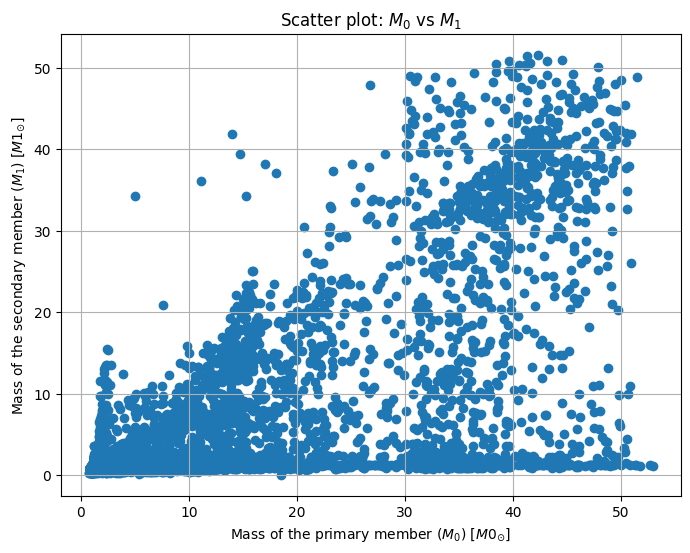

In [27]:
#Scatter plot Mass_1 vs Mass_2
plt.figure(figsize=(8, 6))
plt.scatter(mass_0, mass_1)
plt.xlabel('Mass of the primary member ($M_0$) [$M_{\odot}$]')
plt.ylabel('Mass of the secondary member ($M_1$) [$M_{\odot}$]')
plt.title('Scatter plot: $M_0$ vs $M_1$')
plt.grid(True)
plt.show()

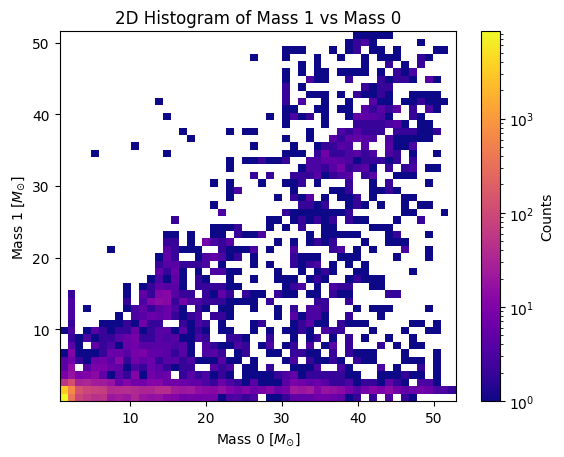

In [47]:

# 2D histogram of Mass 1 versus Mass 0
plt.hist2d(filtered_data['Mass_0'], filtered_data['Mass_1'], bins=50, cmap='plasma', norm=LogNorm())
plt.colorbar(label='Counts')
plt.xlabel('Mass 0 [$M_{\odot}$]')
plt.ylabel('Mass 1 [$M_{\odot}$]')
plt.title('2D Histogram of Mass 1 vs Mass 0')
plt.show()

In [49]:
black_hole_systems = df[(df['RemnantType_0'] == 6) & (df['RemnantType_1'] == 6)]
print(f"Number of binary systems where both members are black holes: {len(black_hole_systems)}")


Number of binary systems where both members are black holes: 1732


Exrcise 1 with Numpy

In [61]:
data_np = np.genfromtxt('/home/chris/PythonAdvanced/120924/SEVN_output.csv', delimiter=',', skip_header=1, usecols=(2, 9))


In [72]:
data_mass0 = data_np[:,0]
data_mass1 = data_np[:,1]

In [73]:
#Remove rows where either Mass 0 or Mass 1 is NaN
valid_indices = ~np.isnan(mass_0) & ~np.isnan(mass_1)
filtered_mass0 = mass_0[valid_indices]
filtered_mass1 = mass_1[valid_indices]

In [77]:
data_np = np.genfromtxt('/home/chris/PythonAdvanced/120924/SEVN_output.csv', delimiter=',', skip_header=1, usecols=(7, 14))

# Count the number of systems where both RemnantType 0 and RemnantType 1 are equal to 6
black_hole_systems = np.logical_and(data_np[:,0]== 6, data_np[:,1] == 6)

# Calculate the number of such systems
num_black_hole_systems = np.sum(black_hole_systems)
print(f"Number of binary systems where both members are black holes: {(num_black_hole_systems)}")

Number of binary systems where both members are black holes: 1732
